In [0]:
from fastai.vision import *

In [0]:
!pip install kaggle

In [0]:
pwd

'/content'

In [0]:
mkdir .kaggle

In [0]:
#importing json file
import json
token = {"username":" ","key":" "}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
ls -la

total 20
drwxr-xr-x 1 root root 4096 Feb 26 16:49 ./
drwxr-xr-x 1 root root 4096 Feb 26 16:49 ../
drwxr-xr-x 1 root root 4096 Feb 19 17:16 .config/
drwxr-xr-x 2 root root 4096 Feb 26 16:50 .kaggle/
drwxr-xr-x 1 root root 4096 Feb 19 17:17 sample_data/


In [0]:
cd /root

/root


In [0]:
ls -la

total 68
drwx------ 1 root root 4096 Feb 26 16:49 ./
drwxr-xr-x 1 root root 4096 Feb 26 16:49 ../
-rw-r--r-- 1 root root 3106 Apr  9  2018 .bashrc
drwx------ 1 root root 4096 Feb 22 17:43 .cache/
drwx------ 4 root root 4096 Feb 22 17:42 .config/
drwxr-xr-x 4 root root 4096 Feb 26 16:49 .forever/
drwxr-xr-x 3 root root 4096 Feb 22 17:09 .gsutil/
drwxr-xr-x 1 root root 4096 Feb 22 17:40 .ipython/
drwx------ 2 root root 4096 Feb 22 17:40 .jupyter/
drwxr-xr-x 2 root root 4096 Feb 26 16:49 .keras/
drwx------ 1 root root 4096 Feb 22 17:40 .local/
drwxr-xr-x 3 root root 4096 Feb 22 17:41 .node-gyp/
drwxr-xr-x 4 root root 4096 Feb 22 17:41 .npm/
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile


In [0]:
!mkdir .kaggle

In [0]:
cd /root/.kaggle

/root/.kaggle


In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [0]:
ls -la

total 16
drwxr-xr-x 2 root root 4096 Feb 26 16:50 ./
drwx------ 1 root root 4096 Feb 26 16:50 ../
-rw-r--r-- 1 root root   70 Feb 26 16:50 kaggle.json


In [0]:
cd /content

/content


In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content/pneumonia

 98% 1.13G/1.15G [00:08<00:00, 152MB/s]
100% 1.15G/1.15G [00:08<00:00, 145MB/s]


In [0]:
cd pneumonia

/content/pneumonia


In [0]:
!unzip '/content/pneumonia/chest-xray-pneumonia.zip'

Archive:  /content/pneumonia/chest-xray-pneumonia.zip
  inflating: chest_xray.zip          


In [0]:
!unzip '/content/pneumonia/chest_xray.zip'

Archive:  /content/pneumonia/chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/ch

In [0]:
path='/content/pneumonia/chest_xray'

In [0]:
# create a data bunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, num_workers=0, 
                                  bs=64, valid_pct=0.2).normalize(imagenet_stats)

In [0]:
len(data.train_ds), len(data.valid_ds)

(4685, 1171)

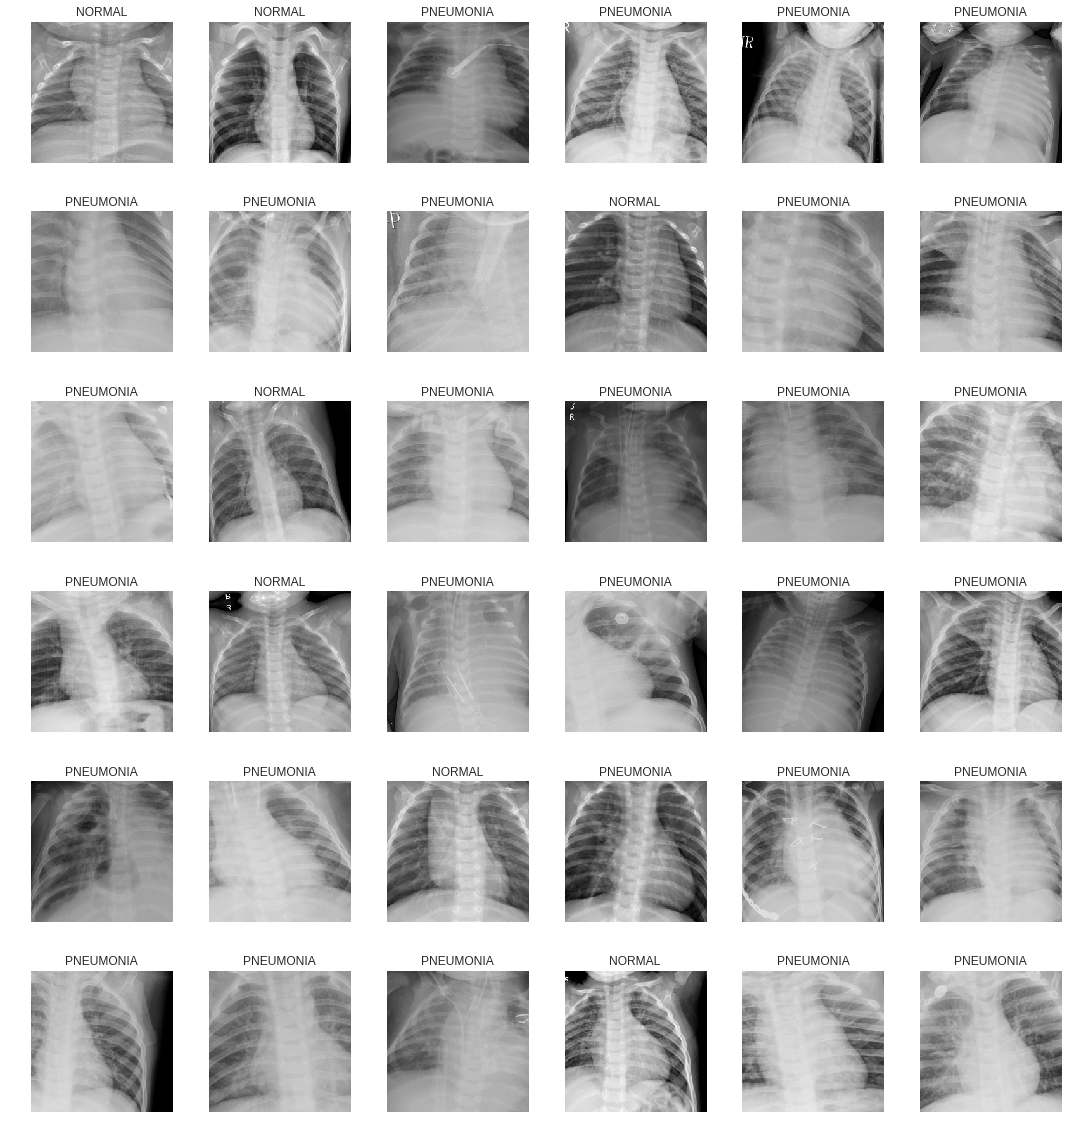

In [0]:
# display 6 rows of data
data.show_batch(rows=6, figsize=(15,16))

In [0]:
# verify the classes
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 81661792.33it/s]


In [0]:
# fit 6 layers
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate
1,0.331410,0.270052,0.078565
2,0.225391,0.181378,0.053800
3,0.169389,0.125580,0.040991
4,0.141654,0.105776,0.039283
5,0.131547,0.114187,0.037575
6,0.118964,0.104033,0.035013


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06


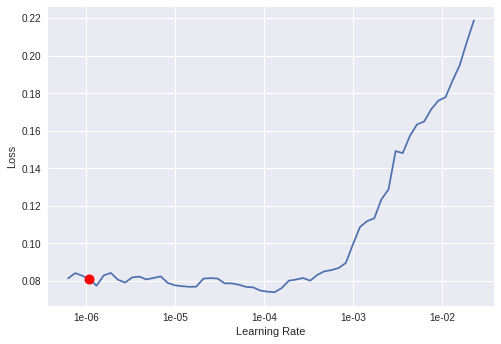

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8, max_lr=slice(1.10E-06,1.0E-04))

epoch,train_loss,valid_loss,error_rate
1,0.088458,0.098660,0.035867
2,0.082319,0.092366,0.029889
3,0.076359,0.085781,0.026473
4,0.066382,0.082021,0.023911
5,0.062365,0.087904,0.028181
6,0.057826,0.080455,0.023057
7,0.053883,0.078760,0.023911
8,0.054623,0.093617,0.030743


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

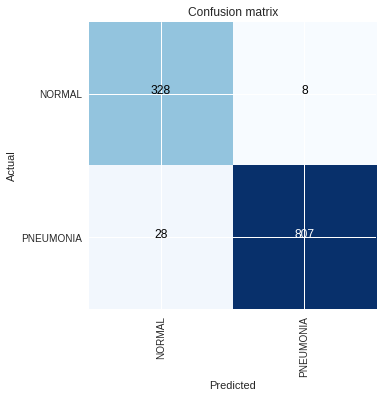

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
img = open_image('')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [0]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

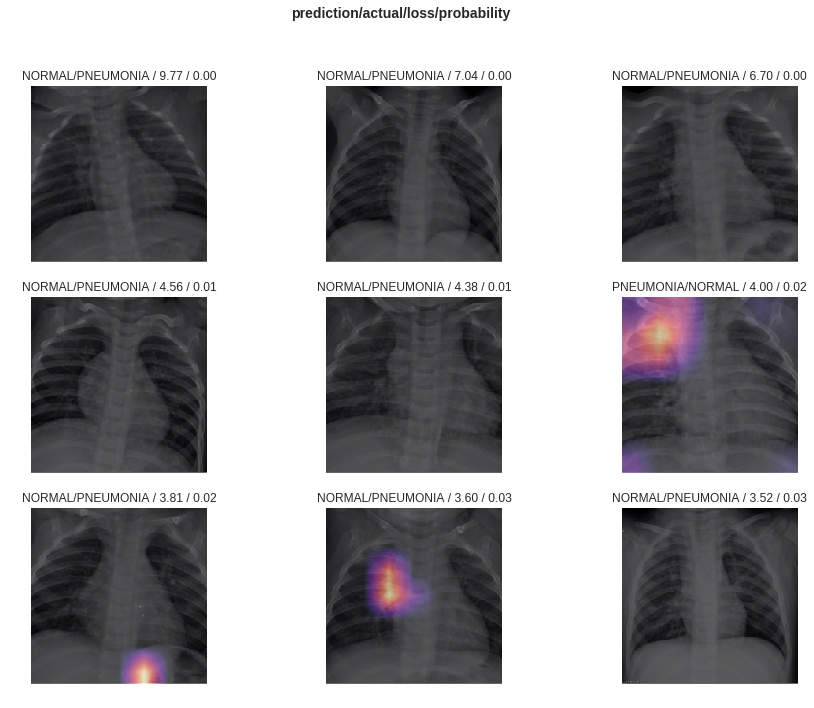

In [0]:
# plot the top losses
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
from fastai.callbacks.hooks import *
def plot_top_losses_heatmap(k,learner, largest= True,figsize=(15,11)):
    tl_val,tl_idx = interp.top_losses(k,largest)
    print (tl_idx)
    classes = interp.data.classes
    rows = math.ceil(math.sqrt(k))
    fig,axes = plt.subplots(rows,rows,figsize=figsize)
    fig.suptitle('prediction/actual/loss/probability', weight='bold', size=14)
    for i,idx in enumerate(tl_idx):
        im,cl = interp.data.valid_ds[idx]
        cl = int(cl)
        ###
        xb,_ = data.one_item(im)
        xb = xb.cuda()
        m = learner.model.eval()
        with hook_output(m[0]) as hook_a:
            with hook_output(m[0], grad= True) as hook_g:
                preds = m(xb)
                preds[0,cl].backward()
        acts = hook_a.stored[0].cpu()
        avg_acts =acts.mean(0)
        sz = im.shape[-1]
        im.show(ax=axes.flat[i], title=
            f'{classes[interp.pred_class[idx]]}/{classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
        axes.flat[i].imshow(avg_acts, alpha =0.6, extent= (0,sz,sz,0), interpolation='bilinear', cmap='magma')

tensor([623, 693,  97, 874, 105, 735, 626, 197, 331])


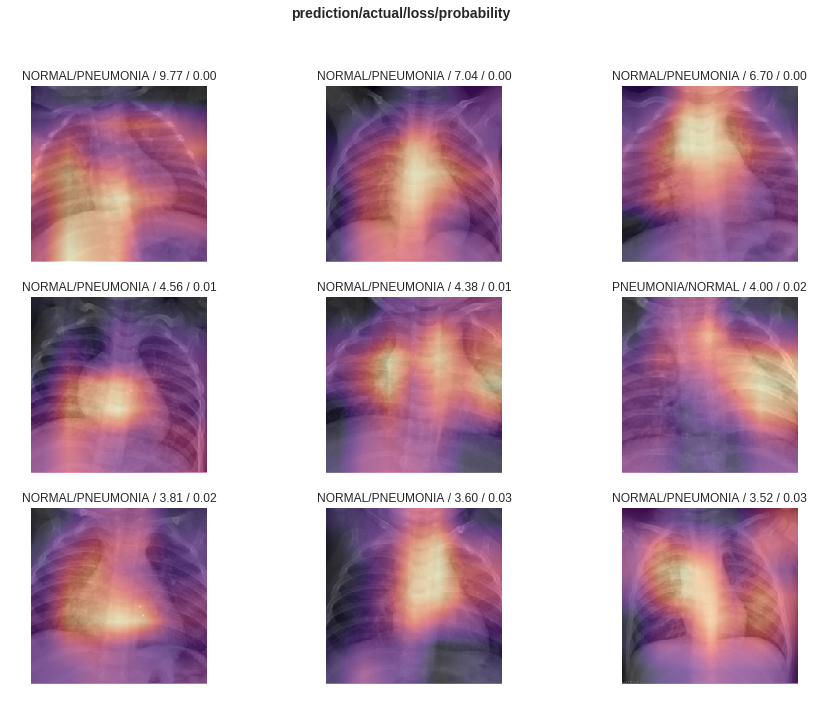

In [0]:
plot_top_losses_heatmap(9,learn,True)